<a href="https://colab.research.google.com/github/TianyiFan30/CS491/blob/main/ParsingBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialize things

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

import graphviz

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Function to convert NLTK tree to graphviz source
def to_graphviz(tree):
    dot = graphviz.Digraph(comment='Parse Tree')

    def add_nodes_edges(tree, dot, parent_index=None, index=0):
        node_index = index
        if isinstance(tree, nltk.Tree):
            node_label = tree.label()
            dot.node(str(node_index), node_label)
            if parent_index is not None:
                dot.edge(str(parent_index), str(node_index))
            for child in tree:
                index += 1
                index = add_nodes_edges(child, dot, node_index, index)
        else:
            # Leaf node
            dot.node(str(index), str(tree))
            if parent_index is not None:
                dot.edge(str(parent_index), str(index))
        return index

    add_nodes_edges(tree, dot)
    return dot


# Convert tree to graphviz source and display



In [ ]:
sent = 'I saw the man with the telescope'

# sentences and grammars: chunking


In [ ]:

grammar = """
    GERUND_PHRASE: {<VBG><NNS>}                # Gerund Phrase
    NP: {<DT>?<JJ>*<NNS>}                      # Noun Phrase
    VP: {<MD><VB><JJ>}                         # Verb Phrase for modal verbs
    ADJP: {<RB>*<JJ>}                          # Adjective Phrase
    NP: {<DT>?<JJ>*<NN.*>}
    VP: {<V.*><.*>?<VP>?}
"""

parser = nltk.RegexpParser(grammar)

In [ ]:
#  Tokenizing and tagging
tokens = nltk.word_tokenize(sent)
tagged = nltk.pos_tag(tokens)
print(f'tokens are {tokens}')
print(f'POS tags are {tagged}')

tokens are ['I', 'saw', 'the', 'man', 'with', 'the', 'telescope']
POS tags are [('I', 'PRP'), ('saw', 'VBD'), ('the', 'DT'), ('man', 'NN'), ('with', 'IN'), ('the', 'DT'), ('telescope', 'NN')]


In [ ]:
# Create tree
tree = parser.parse(tagged)
print(tree)

(S I/PRP saw/VBD the/DT man/NN with/IN the/DT telescope/NN)


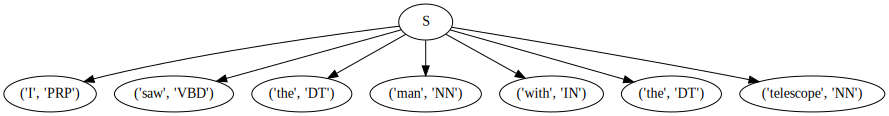

In [ ]:
dot_source1 = to_graphviz(tree)
display(dot_source1)

In [ ]:
# prompt: replace ('brown', 'NN') with  ('brown', 'JJ") in tagged
for i, (word, tag) in enumerate(tagged):
  if tagged[i][0] == 'saw':
        tagged_alt = tagged.copy()
        tagged_alt[i] = ('saw', 'JJ')
        break

In [ ]:
tagged_alt

[('I', 'PRP'),
 ('saw', 'JJ'),
 ('the', 'DT'),
 ('man', 'NN'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('telescope', 'NN')]

In [ ]:
# Create tree
tree_alt = parser.parse(tagged_alt)
print(tree_alt)

(S I/PRP (ADJP saw/JJ) the/DT man/NN with/IN the/DT telescope/NN)


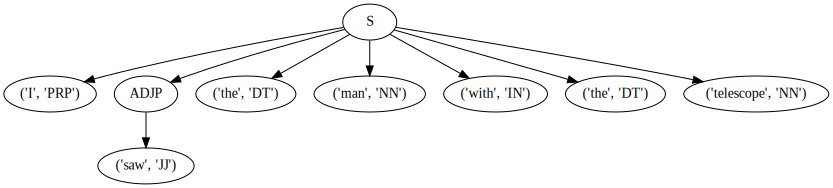

In [ ]:
dot_source_alt = to_graphviz(tree_alt)
display(dot_source_alt)

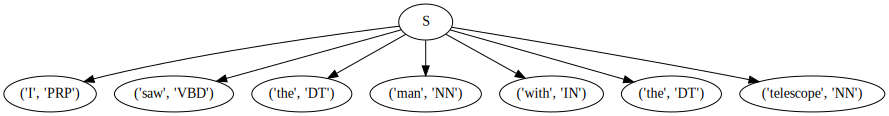

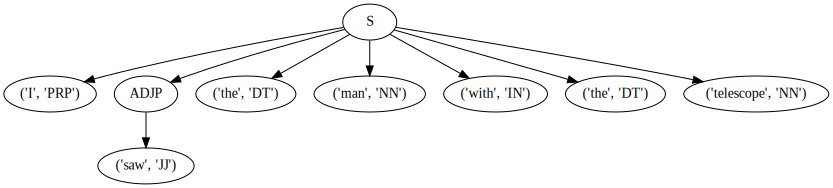

In [ ]:
display(dot_source1)
display(dot_source_alt)